# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [2]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [78]:
def ridder(f,a,b,tol=1e-8,max_iter=100):
  # Documentación de la función Ridder
  '''
  Esta función implementa el método de Ridder para encontrar la raíz de una función.

  Parámetros:
  f (function): La función para la cual se busca la raíz.
  a (float): El límite inferior del intervalo.
  b (float): El límite superior del intervalo.
  tol (float, optional): La tolerancia para el criterio de parada. Por defecto es 1e-8.
  max_iter (int, optional): El número máximo de iteraciones permitidas. Por defecto es 100.

  Retorna:
  tuple: Una tupla que contiene la raíz encontrada y el número de iteraciones.

  Raises:
  ValueError: Si s es igual a 0 en alguna iteración.
  '''
  n=0 # Inicializa el contador de iteraciones
  terminos=[] # Inicializa una lista para almacenar los términos (aunque no se usa en el retorno)
  while n < max_iter: # Bucle principal que se ejecuta hasta el número máximo de iteraciones
      m=(a+b)/2 # Calcula el punto medio del intervalo
      # Calcula el término s de la corrección exponencial
      s=np.sqrt((f(m)**2)-(f(a)*f(b)))
      if s==0:
        # Lanza un error si s es 0, indicando que la raíz no puede estimarse
        raise ValueError("La raíz no puede estimarse en esta iteración")
      # Calcula el nuevo candidato a raíz usando la fórmula de Ridder
      x=m+(((m-a)*f(m))/(s))*np.sign(f(a)-f(b))
      # Evalúa f(m) * f(x) para actualizar el intervalo
      if f(m)*f(x)<0:
        # Si el signo cambia entre m y x, la raíz está en [m, x]
        a=m
        b=x
      elif f(a)*f(x)<0:
        # Si el signo cambia entre a y x, la raíz está en [a, x]
        b=x
      else:
        # Si no, la raíz está en [x, b]
        a=x
      terminos.append(x) # Agrega el nuevo candidato a raíz a la lista de términos
      n+=1 # Incrementa el contador de iteraciones
      # Criterio de parada: si el valor absoluto de f(x) es menor que la tolerancia
      if abs(f(x))<tol:
        return x, n+1 # Retorna la raíz encontrada y el número de iteraciones

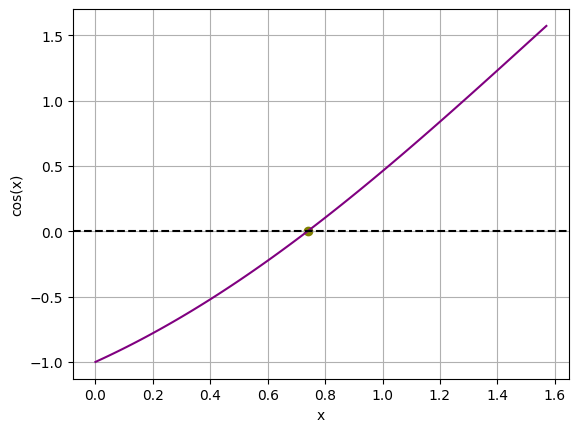

In [79]:
f= lambda x: x-np.cos(x)
x=np.linspace(0,np.pi/2,100)
raiz, iteraciones = ridder(f,1,np.pi/2)


plt.plot(x,f(x),color="purple")
plt.axhline(0, color ="black", ls ="--")
plt.scatter(raiz,0, color ="olive")
plt.xlabel("x")
plt.ylabel ("cos(x)")
plt.grid()
plt.show()

In [15]:
df = pd.DataFrame({'x':x,'f(x)':f(x)})
print(df[(df['f(x)']<0.1)&(df['f(x)']>-0.1)])

           x      f(x)
43  0.682265 -0.093881
44  0.698132 -0.067913
45  0.713998 -0.041751
46  0.729865 -0.015399
47  0.745732  0.011140
48  0.761598  0.037864
49  0.777465  0.064771
50  0.793331  0.091857


In [6]:
raiz_biseccion=bisect(f, -np.pi/2,np.pi/2)
print(f'Metodo de bisección:', raiz_biseccion)

raiz_newton=newton(f,-np.pi/2,x1=np.pi/2)
print(f'Metodo de secante:', raiz_newton)

print(f'Metodo Ridder:', raiz)

#El metodo Ridder es un poco menos eficiente que los metodos de bisección y Newton-Raphson

Metodo de bisección: 0.7390851332152737
Metodo de secante: 0.7390851332151585
Metodo Ridder: 0.7390851334994524


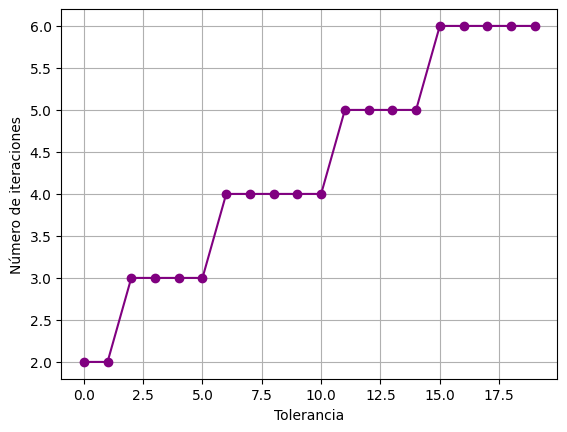

In [80]:
# Define un array de tolerancias en escala logarítmica
tol = np.logspace(-1, -20, 20)
ridder_iter=[] # Inicializa una lista para almacenar el número de iteraciones para cada tolerancia

# Itera sobre las tolerancias
for i in tol:
  # Encuentra la raíz con el método de Ridder para la tolerancia actual
  raiz_r, iter = ridder(f,0,np.pi/2, tol =i)
  # Añade el número de iteraciones a la lista
  ridder_iter.append(iter)

plt.plot(ridder_iter, color="purple", marker="o")
plt.xlabel("Tolerancia")
plt.ylabel("Número de iteraciones")
plt.grid()
plt.show()

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





In [44]:
def deltaprime(theta, n=1.52, A=60, tol=1e-8, max_iter=100):
  '''
  Calcula la derivada del ángulo de desviación total (delta) con respecto al ángulo de incidencia (theta_i) para un prisma triangular.

  Parámetros:
  theta (float): Ángulo de incidencia (en radianes).
  n (float, optional): Índice de refracción del prisma. Por defecto es 1.52.
  A (float, optional): Ángulo del prisma (en grados). Por defecto es 60.
  tol (float, optional): Tolerancia (no se usa en esta función, presente por consistencia con otras funciones).
  max_iter (int, optional): Número máximo de iteraciones (no se usa en esta función, presente por consistencia).

  Retorna:
  float: El valor de la derivada del ángulo de desviación total con respecto al ángulo de incidencia.
  '''
  # Convierte el ángulo del prisma de grados a radianes para los cálculos trigonométricos.
  A_rad = np.deg2rad(A)
  # Calcula el ángulo de refracción en la primera interfaz (theta_r) usando la ley de Snell.
  theta_r = np.arcsin((np.sin(theta)) / n)
  # Calcula y retorna el valor de la derivada del ángulo de desviación total según la fórmula proporcionada.
  return 1 - ((np.cos(theta)) * (np.cos(A_rad - theta_r))) / ((np.cos(theta_r)) * (np.sqrt(1 - ((n ** 2) * (np.sin(A_rad - theta_r) ** 2)))))

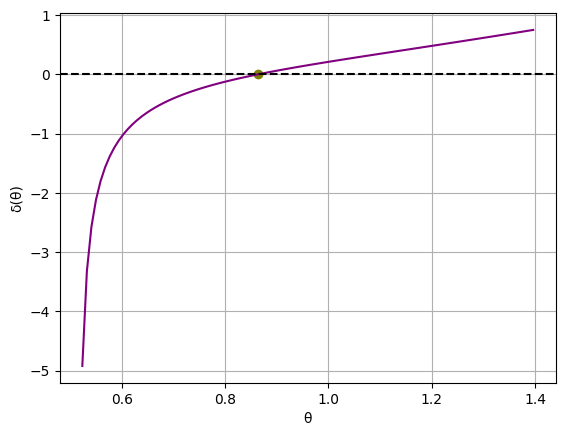

In [61]:
Theta=np.linspace(np.deg2rad(30),np.deg2rad(80),100)
delta=deltaprime(Theta)

plt.plot(Theta, delta, color="purple")
plt.xlabel("θ")
plt.ylabel("δ(θ)")
plt.axhline(0, color="black", ls="--")
plt.scatter(newton(deltaprime,0.8,x1=1.0),0,color="olive")
plt.grid()
plt.show()

In [60]:
Min_n=newton(deltaprime,0.8)
print(f'El valor que minimiza el angúlo de deviación según el método Newton-Raphson es:', Min_n)
Min_s=newton(deltaprime,0.8,x1=1.0)
print(f'El valor que minimiza el angúlo de deviación según el método de la secante es:', Min_s)

El valor que minimiza el angúlo de deviación según el método Newton-Raphson es: 0.8633131150155223
El valor que minimiza el angúlo de deviación según el método de la secante es: 0.8633131150155536


In [66]:
def theta_c(theta, n=1.52, A=60):
  '''
  Calcula el valor de la expresión sin(A - theta_r) - (1/n) para encontrar el ángulo de incidencia crítico.

  Parámetros:
  theta (float): Ángulo de incidencia (en grados).
  n (float, optional): Índice de refracción del prisma. Por defecto es 1.52.
  A (float, optional): Ángulo del prisma (en grados). Por defecto es 60.

  Retorna:
  float: El valor de la expresión sin(A - theta_r) - (1/n).
  '''
  # Convierte el ángulo de incidencia (theta) de grados a radianes para los cálculos trigonométricos.
  theta_rad=np.deg2rad(theta)
  # Calcula el ángulo de refracción en la primera interfaz (theta_r) usando la ley de Snell.
  theta_r=np.arcsin((np.sin(theta_rad))/n)
  # Convierte el ángulo del prisma (A) de grados a radianes para los cálculos trigonométricos.
  A_rad=np.deg2rad(A)
  # Retorna el resultado de la expresión sin(A - theta_r) - (1/n).
  return np.sin(A_rad-theta_r)-(1/n)

In [77]:
print(f'El ángulo de incidencia crítico es:', bisect(theta_c,-90,90,))

El ángulo de incidencia crítico es: 31.92958020211833
